# Лабораторная работа №4
# Начальная настройка весов полностью связанных нейронных сетей
## Алексей Жариков

**Для построения и обучения сетей будем использовать библиотеку Keras**

In [1]:
import keras

Using TensorFlow backend.


**Для работы с матрицами будем использовать библиотеку numpy**

In [0]:
import numpy as np

**Для отрисовки различной информации будем использовать библиотеку matplotlib**

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline  

**Задачу классификации изображений будем рассматривать на наборе данных Fashion MNIST**

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

**Данный набор состоит из изображений в градации серого различных типов одежды**

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Обучающее множество**

In [37]:
print("Количество изображений в обучающем множестве: {}".format(X_train.shape[0]))
print("Размер изображений: {} x {}".format(X_train.shape[1], X_train.shape[2]))
print("Классы объектов: {}".format(np.unique(y_train)))
for i in np.unique(y_train):
  print("Количество объектов класса {}: {}".format(i, sum(y_train == i)))

Количество изображений в обучающем множестве: 60000
Размер изображений: 28 x 28
Классы объектов: [0 1 2 3 4 5 6 7 8 9]
Количество объектов класса 0: 6000
Количество объектов класса 1: 6000
Количество объектов класса 2: 6000
Количество объектов класса 3: 6000
Количество объектов класса 4: 6000
Количество объектов класса 5: 6000
Количество объектов класса 6: 6000
Количество объектов класса 7: 6000
Количество объектов класса 8: 6000
Количество объектов класса 9: 6000


**Тестовое множество**

In [7]:
print("Количество изображений в тестовом множестве: {}".format(X_test.shape[0]))
for i in np.unique(y_test):
  print("Количество объектов класса {}: {}".format(i, sum(y_test == i)))

Количество изображений в тестовом множестве: 10000
Количество объектов класса 0: 1000
Количество объектов класса 1: 1000
Количество объектов класса 2: 1000
Количество объектов класса 3: 1000
Количество объектов класса 4: 1000
Количество объектов класса 5: 1000
Количество объектов класса 6: 1000
Количество объектов класса 7: 1000
Количество объектов класса 8: 1000
Количество объектов класса 9: 1000


**Пример изображений**

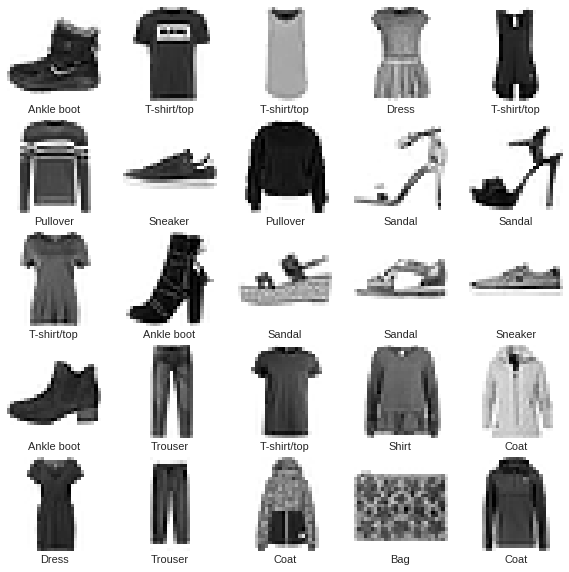

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

**Построение и обучение автоенкодеров**

In [0]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense, Dropout, Activation, Reshape
from keras.optimizers import SGD

Воспользуемся one-hot для кодирования классов изображений

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

Нормализуем в ход в отрезок [0, 1]

In [0]:
minValue = np.min(X_train)
maxValue = np.max(X_train)
X_train = (X_train - minValue) / (maxValue - minValue)
X_test = (X_test - minValue) / (maxValue - minValue)

Вспомогательная функция для отрисовки

In [0]:
def draw(images):
  plt.figure(figsize=(10,10))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 108us/step - loss: 13305.3470 - val_loss: 13308.2664
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 13305.0745 - val_loss: 13308.2664
Epoch 3/20
60000/60000 [==============================] - 5s 86us/step - loss: 13305.0745 - val_loss: 13308.2664
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 13305.0745 - val_loss: 13308.2664
Epoch 5/20
60000/60000 [==============================] - 5s 78us/step - loss: 13305.0745 - val_loss: 13308.2664
Epoch 6/20
60000/60000 [==============================] - 5s 80us/step - loss: 13305.0745 - val_loss: 13308.2664
Epoch 7/20
60000/60000 [==============================] - 5s 79us/step - loss: 13305.0745 - val_loss: 13308.2664
Epoch 8/20
60000/60000 [==============================] - 5s 80us/step - loss: 13305.0745 - val_loss: 13308.2664
Epoch 9/20
60000/60000 [=====================

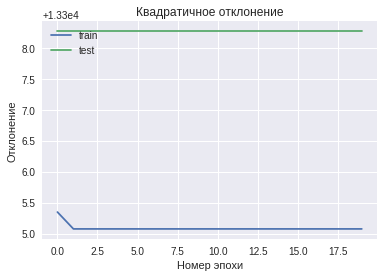

In [39]:
input = Input((28, 28))

def encoder(x):
  net = Flatten(input_shape=(28, 28))(x)
  net = Dense(1024, activation='relu')(net)
  net = Dense(256, activation='relu')(net)
  net = Dense(64, activation='relu')(net)
  return net

base = encoder(input)

# Автокодировщик
def decoder(x):
  net = Dense(256, activation='relu')(x)
  net = Dense(1024, activation='relu')(net)
  net = Dense(28 * 28, activation='sigmoid')(net)
  net = Reshape((28, 28))(net)
  return net

net = decoder(base)

autoencoder = Model(inputs = input, outputs = net)
            
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
autoencoder.compile(loss='mse',
              optimizer=sgd)

history = autoencoder.fit(X_train, X_train,
                    validation_data=(X_test, X_test),
                    epochs=20,
                    batch_size=128)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Квадратичное отклонение')
plt.ylabel('Отклонение')
plt.xlabel('Номер эпохи')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 106us/step - loss: 13305.0745 - val_loss: 13308.2664
Epoch 2/20
60000/60000 [==============================] - 5s 81us/step - loss: 13305.0745 - val_loss: 13308.2664
Epoch 3/20
60000/60000 [==============================] - 5s 81us/step - loss: 13305.0745 - val_loss: 13308.2664
Epoch 4/20
60000/60000 [==============================] - 5s 83us/step - loss: 13305.0745 - val_loss: 13308.2664
Epoch 5/20
60000/60000 [==============================] - 5s 80us/step - loss: 13305.0745 - val_loss: 13308.2664
Epoch 6/20
60000/60000 [==============================] - 5s 84us/step - loss: 13305.0745 - val_loss: 13308.2664
Epoch 7/20
60000/60000 [==============================] - 5s 82us/step - loss: 13305.0745 - val_loss: 13308.2664
Epoch 8/20
60000/60000 [==============================] - 5s 82us/step - loss: 13305.0745 - val_loss: 13308.2664
Epoch 9/20
60000/60000 [=====================

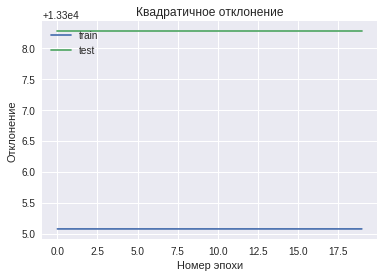

In [40]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
autoencoder.compile(loss='mse',
              optimizer=sgd)

history = autoencoder.fit(X_train, X_train,
                    validation_data=(X_test, X_test),
                    epochs=20,
                    batch_size=128)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Квадратичное отклонение')
plt.ylabel('Отклонение')
plt.xlabel('Номер эпохи')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Оригиналы


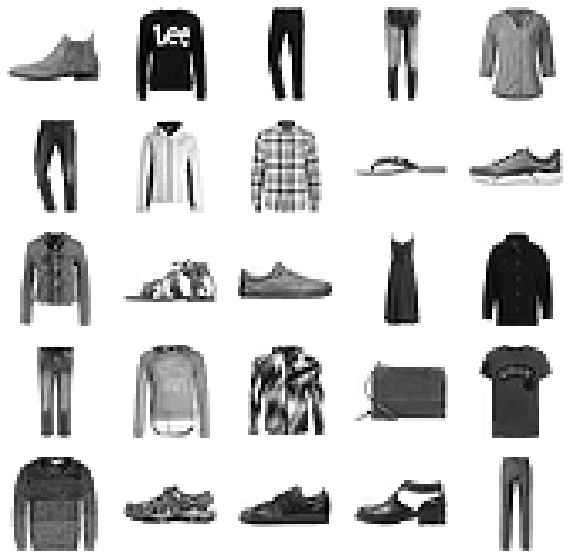

In [15]:
print("Оригиналы")
draw(X_test)

Результат автоенкодера


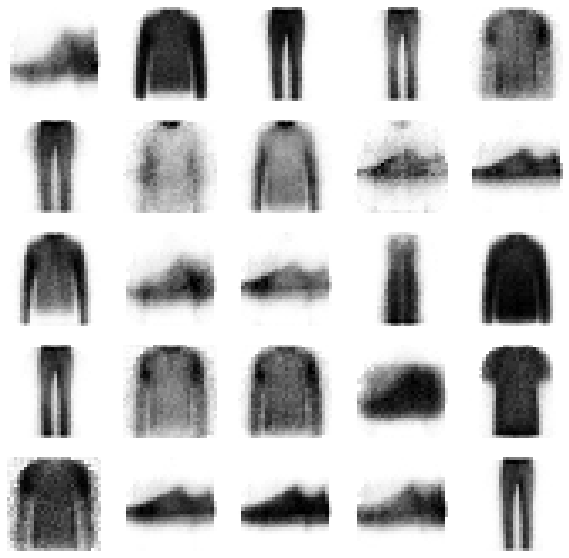

In [16]:
X_pred = model.predict(X_test[:25])
print("Результат автоенкодера")
draw(X_pred)

In [31]:
# Предобученный классификатор




pretrain_classifier = Dense(10, activation='softmax')(base)
model = Model(inputs = input, outputs = pretrain_classifier)

for l1,l2 in zip(pretrain_classifier.layers[:4],autoencoder.layers[0:4]):
    l1.set_weights(l2.get_weights())
for layer in pretrain_classifier.layers[0:4]:
    layer.trainable = False


sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

pretrain_history = model.fit(X_train, y_train,
                              validation_data=(X_test, y_test),
                              epochs=20,
                              batch_size=128)


ValueError: ignored

In [18]:
# Непредобученный классификатор
input = Input((28, 28))
base = encoder(input)
classifier = Dense(10, activation='softmax')(base)
model = Model(inputs = input, outputs = classifier)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.5834 - acc: 0.7985 - val_loss: 0.4498 - val_acc: 0.8439
Epoch 2/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.3929 - acc: 0.8607 - val_loss: 0.3983 - val_acc: 0.8607
Epoch 3/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.3511 - acc: 0.8740 - val_loss: 0.3907 - val_acc: 0.8565
Epoch 4/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.3220 - acc: 0.8841 - val_loss: 0.3638 - val_acc: 0.8718
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.3006 - acc: 0.8904 - val_loss: 0.3430 - val_acc: 0.8770
Epoch 6/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.2837 - acc: 0.8964 - val_loss: 0.3418 - val_acc: 0.8744
Epoch 7/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.2687 - acc: 0.9016 - val_loss: 0.3376 - val_acc

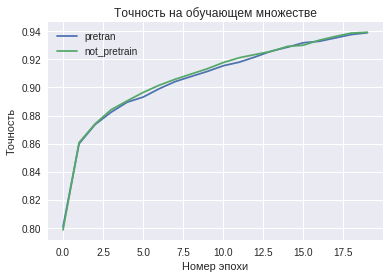

In [19]:
plt.plot(pretrain_history.history['acc'])
plt.plot(history.history['acc'])
plt.title('Точность на обучающем множестве')
plt.ylabel('Точность')
plt.xlabel('Номер эпохи')
plt.legend(['pretran', 'not_pretrain'], loc='upper left')
plt.show()

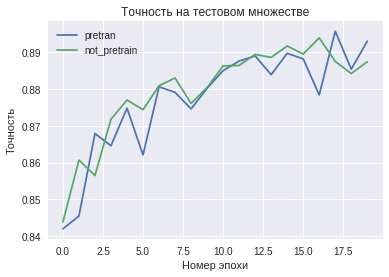

In [20]:
plt.plot(pretrain_history.history['val_acc'])
plt.plot(history.history['val_acc'])
plt.title('Точность на тестовом множестве')
plt.ylabel('Точность')
plt.xlabel('Номер эпохи')
plt.legend(['pretran', 'not_pretrain'], loc='upper left')
plt.show()

**Сверточный автокодировщик**

In [0]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense, Dropout, Activation, Reshape
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from keras.optimizers import SGD

In [0]:
X_train = X_train.reshape([-1, 28, 28, 1])
X_test = X_test.reshape([-1, 28, 28, 1])

In [23]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

AttributeError: ignored

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0136 - val_loss: 0.0093
Epoch 2/5
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0083 - val_loss: 0.0075
Epoch 3/5
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0072 - val_loss: 0.0067
Epoch 4/5
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 5/5
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0062 - val_loss: 0.0059


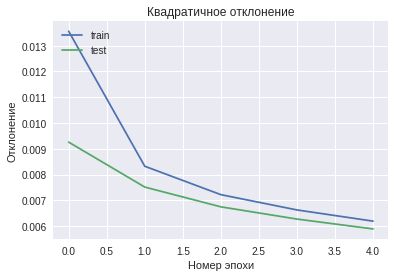

In [24]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

input = Input((28, 28, 1))

def encoder(x):
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x) #28 x 28 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 256
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

base = encoder(input)

# Автокодировщик
def decoder(x):
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(x) #7 x 7 x 128
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #7 x 7 x 64
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    up1 = UpSampling2D((2,2))(conv6) #14 x 14 x 64
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

net = decoder(base)

autoencoder = Model(inputs = input, outputs = net)
            
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
autoencoder.compile(loss='mse',
                    optimizer=sgd)

#SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))


history = autoencoder.fit(X_train, X_train,
                          validation_data=(X_test, X_test),
                          epochs=5,
                          batch_size=32)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Квадратичное отклонение')
plt.ylabel('Отклонение')
plt.xlabel('Номер эпохи')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 33s 553us/step - loss: 0.0057 - val_loss: 0.0058
Epoch 2/5
60000/60000 [==============================] - 28s 460us/step - loss: 0.0056 - val_loss: 0.0058
Epoch 3/5
60000/60000 [==============================] - 28s 460us/step - loss: 0.0056 - val_loss: 0.0058
Epoch 4/5
60000/60000 [==============================] - 28s 461us/step - loss: 0.0056 - val_loss: 0.0058
Epoch 5/5
60000/60000 [==============================] - 28s 459us/step - loss: 0.0056 - val_loss: 0.0058


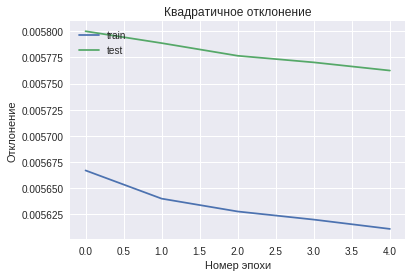

In [25]:
sgd = SGD(lr=0.03, decay=1e-6, momentum=0.9, nesterov=True)
autoencoder.compile(loss='mse',
                    optimizer=sgd)

history = autoencoder.fit(X_train, X_train,
                          validation_data=(X_test, X_test),
                          epochs=5,
                          batch_size=512)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Квадратичное отклонение')
plt.ylabel('Отклонение')
plt.xlabel('Номер эпохи')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Оригиналы


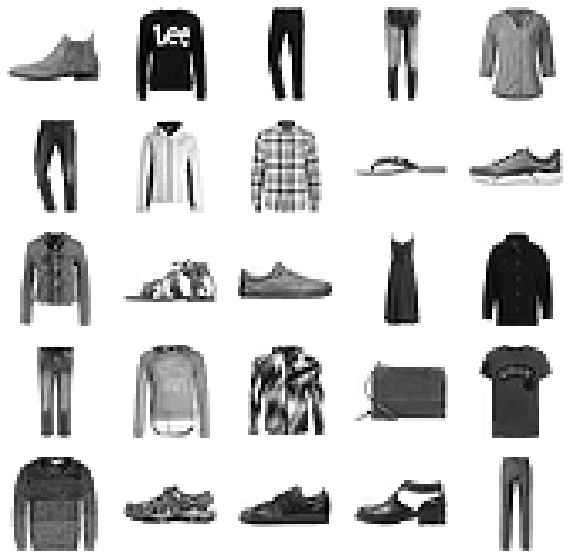

In [26]:
print("Оригиналы")
draw(X_test.reshape([-1, 28, 28]))

Результат автоенкодера


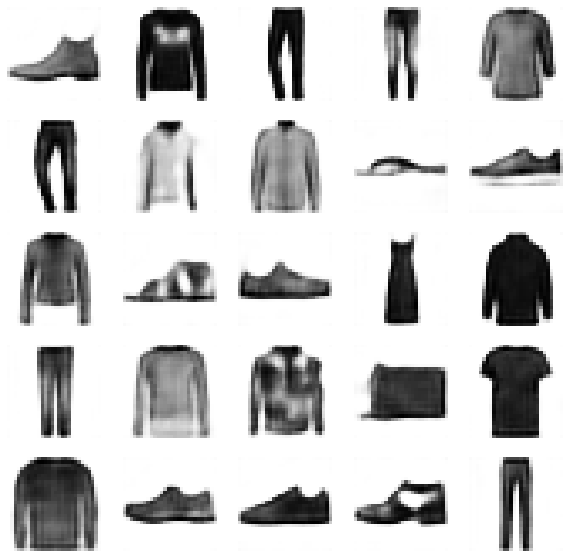

In [27]:
X_pred = autoencoder.predict(X_test[:25])
print("Результат автоенкодера")
draw(X_pred.reshape([-1, 28, 28]))

In [28]:
# Предобученный классификатор
def fc(x):
    flat = Flatten()(x)
    fc1 = Dense(128, activation='relu')(flat)
    fc2 = Dense(10, activation='softmax')(fc1)
    return fc2

  
input = Input((28, 28, 1))

net = encoder(input)

pretrain_classifier = Model(input, fc(net))

for l1,l2 in zip(pretrain_classifier.layers[:19],autoencoder.layers[0:19]):
    l1.set_weights(l2.get_weights())
for layer in pretrain_classifier.layers[0:19]:
    layer.trainable = False
    
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
pretrain_classifier.compile(loss='categorical_crossentropy',
                            optimizer=sgd,
                            metrics=['accuracy'])

pretrain_history = pretrain_classifier.fit(X_train, y_train,
                                           validation_data=(X_test, y_test),
                                           epochs=20,
                                           batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.4580 - acc: 0.8486 - val_loss: 0.3483 - val_acc: 0.8743
Epoch 2/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.3024 - acc: 0.8895 - val_loss: 0.3169 - val_acc: 0.8846
Epoch 3/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.2707 - acc: 0.8991 - val_loss: 0.3022 - val_acc: 0.8892
Epoch 4/20
60000/60000 [==============================] - 11s 189us/step - loss: 0.2518 - acc: 0.9058 - val_loss: 0.3062 - val_acc: 0.8878
Epoch 5/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.2366 - acc: 0.9112 - val_loss: 0.3162 - val_acc: 0.8902
Epoch 6/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.2257 - acc: 0.9154 - val_loss: 0.2944 - val_acc: 0.8974
Epoch 7/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.2144 - acc: 0.9197 - val_loss: 0.

In [29]:
# Непредобученный классификатор
def fc(x):
    flat = Flatten()(x)
    fc1 = Dense(128, activation='relu')(flat)
    fc2 = Dense(10, activation='softmax')(fc1)
    return fc2

  
input = Input((28, 28, 1))

net = encoder(input)

model = Model(input, fc(net))
    
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
                            optimizer=sgd,
                            metrics=['accuracy'])

history = model.fit(X_train, y_train,
                                           validation_data=(X_test, y_test),
                                           epochs=20,
                                           batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 33s 558us/step - loss: 0.3692 - acc: 0.8666 - val_loss: 0.2911 - val_acc: 0.8942
Epoch 2/20
60000/60000 [==============================] - 30s 502us/step - loss: 0.2248 - acc: 0.9159 - val_loss: 0.2892 - val_acc: 0.9006
Epoch 3/20
60000/60000 [==============================] - 31s 509us/step - loss: 0.1753 - acc: 0.9341 - val_loss: 0.2400 - val_acc: 0.9161
Epoch 4/20
60000/60000 [==============================] - 30s 501us/step - loss: 0.1391 - acc: 0.9475 - val_loss: 0.2418 - val_acc: 0.9183
Epoch 5/20
60000/60000 [==============================] - 30s 499us/step - loss: 0.1084 - acc: 0.9590 - val_loss: 0.2613 - val_acc: 0.9125
Epoch 6/20
60000/60000 [==============================] - 30s 508us/step - loss: 0.0857 - acc: 0.9682 - val_loss: 0.2722 - val_acc: 0.9190
Epoch 7/20
60000/60000 [==============================] - 30s 507us/step - loss: 0.0635 - acc: 0.9765 - val_loss: 0.

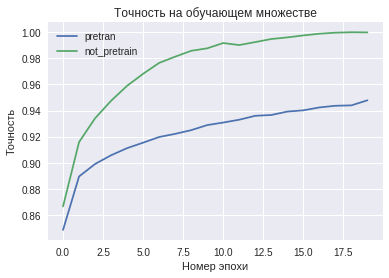

In [30]:
plt.plot(pretrain_history.history['acc'])
plt.plot(history.history['acc'])
plt.title('Точность на обучающем множестве')
plt.ylabel('Точность')
plt.xlabel('Номер эпохи')
plt.legend(['pretran', 'not_pretrain'], loc='upper left')
plt.show()